In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [3]:
End = '2016-07-15'

In [4]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [5]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [6]:
if Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-10:
    
    
    #Trend wzrostowy L1
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1 * Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a1 = (Ay-By)/(Ax-Bx)
        b1 = By - a1 * Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  Wcześniej niż 20 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1 * Bx
                
            Cx = df1.index.max()+60
            Cy = a1 * Cx + b1
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
    
    
    #--------------------------------------------------------------------
    # Trend spadkowy M1
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2 * Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2 * Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2 * Bx
                
            Cx = df2.index.max() +10
            Cy = a2 * Cx + b2
            C = [Cx, Cy]
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy>df1.High.mean()*0.3:
                        break
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy < df1.High.max()*(3/2):
                        break

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]

Pierwszy trend:  Wzrostowy
Max/Min:  Wcześniej niż 20 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy
Punkt A:[16672.0, 199.567001], Punkt C: [17057.0, 538.2197908713242]
------------------------------------------------------------------------------
TREND M1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu
Punkt A:[16970.0, 777.98999], Punkt C: [17007.0, 520.728879000002]


In [7]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2016-07-20'

In [8]:
End = pd.to_datetime(End)
dfxx = df.loc[Start:End]
dfxx.index = dfxx.index.map(mdates.date2num)

In [9]:
dfM1 = dfxx[Max_idx:]
dfM1['TrendLine'] = dfM1.index * a2 + b2

dfM1['Distance(Close-TL)'] = dfM1['TrendLine'] - dfM1['Close']
dfM1['Distance(Open-TL)'] = dfM1['TrendLine'] - dfM1['Open']
dfM1['Distance(High-TL)'] = round(dfM1['TrendLine'],1) - round(dfM1['High'],1)

QPointsAfterBrake = len(dfM1['Distance(Close-TL)'][dfM1['Distance(Close-TL)']<0])

if QPointsAfterBrake > 0:
    
    print('Szukamy tunelu')
    
    
    
    #Sprawdzamy czy trend został przerwany całą świecą (Open-Close)
    BPPositionToCheck = dfM1.index[dfM1['Distance(Close-TL)']<0][0]
    BPOpenTL = dfM1['Distance(Open-TL)'].loc[BPPositionToCheck]
    
    #Jeśli cała świeca przerwała TL(M1)
    if BPOpenTL > 0:
        
        print('BPPosision founded is correct.')
        
        #Sprawdzamy, czy wielkość tunelu jest większa niż 25% wielkości świeczki
        BPPosition = BPPositionToCheck
        BPPrice = BPPosition * a2 + b2
        OpenBPPrice = dfM1['Open'].loc[BPPosition]
        CloseBPPrice = dfM1['Close'].loc[BPPosition]
        BPCandleHeight = OpenBPPrice - CloseBPPrice
        TunelHeight = BPPrice - CloseBPPrice
        
        #Sprawdzamy, czy przecięcie wydarzyło się w ostatnich 80 dniach
        EndingPoint = dfM1.index[-1]

        if EndingPoint - 80 > BPPosition:
            print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
            print('-----------------------------------------------------------------------------------------')
            print('Nie rysujemy tuneli')

        else:
            print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
            print('---------------------------------------------------------------------------------')
        
            #Jeżeli tunel jest mniejszy niż 25% wielkości świeczki downline = Open BP, upline = Close BP
            if TunelHeight/BPCandleHeight < 1/4:
                
                #Współrzędne tuneli
                BPPositionEnd = dfM1.index[-1] + 5
                
                UpLineX = [BPPosition, BPPositionEnd]
                UplineY = [CloseBPPrice, CloseBPPrice]
                DownLineX = [BPPosition, BPPositionEnd]
                DownLineY = [OpenBPPrice, OpenBPPrice]
                
                print('Przebicie trendu spadkowego M1 w górę')
                print(f'Poziom wsparcia: {OpenBPPrice}')
                print(f'Poziom oporu: {CloseBPPrice}')
                print('---------------------------------------')
                
                #Szukamy przecięć tuelu
                dfM1a = dfxx[BPPosition:]
                dfM1a['DownLine'] = OpenBPPrice
                dfM1a['UpLine'] = CloseBPPrice
                dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
                dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']
                
                #Liczymy przecięcia tuneli tuneli
                DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
                UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])
            
                #Jeżeli tylko przebicie w dół
                if DownBreaks > 0 and UpBreaks == 0:
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
                    BP1 = [BPPosition, OpenBPPrice]
                    BP2 = [BP2Position, BP2Price]
                    BP3 = BP2
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Position}')
                    
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - OpenBPPrice
                    HeightOfBreak = OpenBPPrice - BP2Price
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Short position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] < BP2Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                    
                    
                    
                    else:
                        print('No decisice BP yet')
                        
                #----------------------------------------------------------------
                
                #Jeśeli tylko przebicie w górę
                elif UpBreaks >0 and DownBreaks ==0:
                    
                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    BP1 = [BPPosition, OpenBPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - OpenBPPrice
                    HeightOfBreak = BP3Price - CloseBPPrice
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('------------------------------------------------')
                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Long position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] > BP3Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is higher than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                        
                    else:
                        print('No decisice BP yet')
                        
                #------------------------------------------------------------------
                #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz
                
                elif DownBreaks > 0 and UpBreaks > 0:
                    
                    BP1 = [BPPosition, OpenBPPrice]
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    
                    #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
                    if BP2Position < BP3Position:

                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')
                    
                    #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
                    elif BP2Position > BP3Position:

                        
                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
            #----------------------------------------------------------------------
                #Jeżeli nie było żadnego przebicia
                else:
                    
                    BP1 = [BPPosition, OpenBPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    
                    print('No break point founded. You should wait')
                

        
        #------------------------------------------------------------------------------------------------------
            #Jeżeli tunel jest większy niż 25% wielkości świeczki downline = BP, upline = Close BP
            else:
                
                #Współrzędne tuneli
                BPPositionEnd = dfM1.index[-1] + 5
                
                UpLineX = [BPPosition, BPPositionEnd]
                UplineY = [CloseBPPrice, CloseBPPrice]
                DownLineX = [BPPosition, BPPositionEnd]
                DownLineY = [BPPrice, BPPrice]
                
                print('Przebicie trendu spadkowego M1 w górę')
                print(f'Poziom wsparcia: {BPPrice}')
                print(f'Poziom oporu: {CloseBPPrice}')
                print('---------------------------------------')
                
                #Szukamy przecięć tuelu
                dfM1a = dfxx[BPPosition:]
                dfM1a['DownLine'] = BPPrice
                dfM1a['UpLine'] = CloseBPPrice
                dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
                dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']
                
                #Liczymy przecięcia tuneli tuneli
                DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
                UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])
            
                #Jeżeli tylko przebicie w dół
                if DownBreaks > 0 and UpBreaks == 0:
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
                    BP1 = [BPPosition, BPPrice]
                    BP2 = [BP2Position, BP2Price]
                    BP3 = BP2
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Position}')
                    
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - BPPrice
                    HeightOfBreak = BPPrice - BP2Price
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Short position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] < BP2Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                    
                    
                    
                    else:
                        print('No decisice BP yet')
                        
                #----------------------------------------------------------------
                
                #Jeśeli tylko przebicie w górę
                elif UpBreaks >0 and DownBreaks ==0:
                    
                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    BP1 = [BPPosition, BPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - BPPrice
                    HeightOfBreak = BP3Price - CloseBPPrice
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('------------------------------------------------')
                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Long position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] > BP3Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is higher than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                        
                    else:
                        print('No decisice BP yet')
                        
                #------------------------------------------------------------------
                #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz
                
                elif DownBreaks > 0 and UpBreaks > 0:
                    
                    BP1 = [BPPosition, BPPrice]
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    
                    #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
                    if BP2Position < BP3Position:

                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')
                    
                    #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
                    elif BP2Position > BP3Position:

                        
                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
                #----------------------------------------------------------------------
                #Jeżeli nie było żadnego przebicia
                else:
                    
                    BP1 = [BPPosition, BPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    
                    print('No break point founded. You should wait')
                  
            
#--------------------------------------------------------------------------------------------------------------            
    #Jeśli cała świeca znalazła się nad TL(M1), a przerwanie nastąpiło przez przerwanie High-Close        
    else:
        print('no')
            
        
            

Szukamy tunelu
BPPosision founded is correct.
Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu
---------------------------------------------------------------------------------
Przebicie trendu spadkowego M1 w górę
Poziom wsparcia: 680.647947999998
Poziom oporu: 703.702026
---------------------------------------
Second BP founded
BP2Price: 658.664001, BP2Position: 16985.0
BP2 breaks Tunel by more than 50% height of tunel
Short position recomended


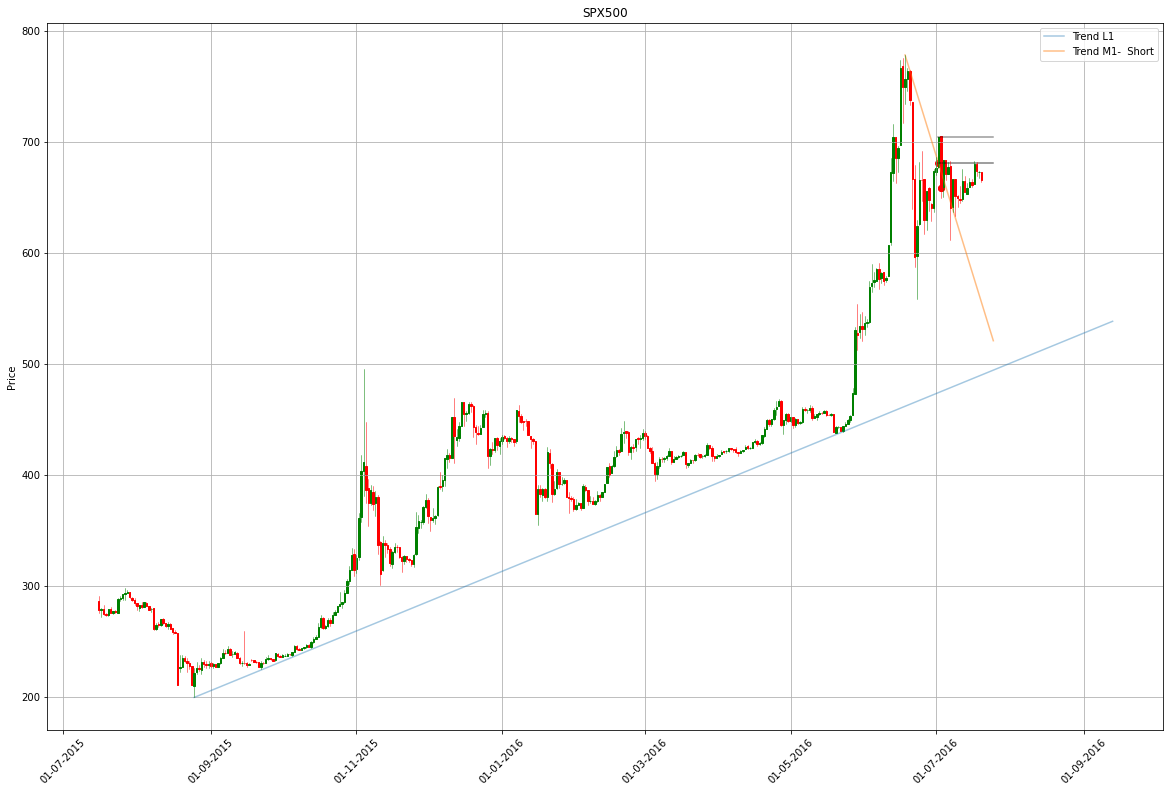

In [10]:
dfxx.reset_index(inplace = True)
dfM1.reset_index(inplace = True)
dfM1a.reset_index(inplace = True)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(UpLineX, UplineY, color='black', alpha = 0.4)
ax3.plot(DownLineX, DownLineY, color='black', alpha = 0.5)

ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
plt.show()

# Kolejne (2) przerwanie M1

In [11]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2016-07-25'

In [12]:
End = pd.to_datetime(End)
dfxxx = df.loc[Start:End]
dfxxx.index = dfxxx.index.map(mdates.date2num)

In [13]:
#Sprawdzamy czy nastąpiło przerwanie nr. 1.
#Jeśli BP12(Kolejne przerwanie) istnieje to przerwanie nr. 1 wystąpiło na pewno

try:
    BP2
except NameError:

    print("First break of trend did not occur")

else:
    
    print("First break of trend occured. We can check if trend goes down and breaks trendline going up again")
    
    #Sprawdzamy, czy trend został przebity w dół
    dfM11 = dfxxx[BP2[0]:]
    dfM11['TrendLine'] = dfM11.index * a2 + b2
    dfM11['DownBreakOfTL'] = dfM11['TrendLine'] - dfM11['Close']
    
    #Jeśli TL zostało przecięte przez cene w dół:
    if len(dfM11[dfM11['DownBreakOfTL']>0]) > 0:
        
        BPDownPosition = dfM11.index[dfM11['DownBreakOfTL']>0][0]
        BPDownPrice = dfM11['Close'][dfM11['DownBreakOfTL'] > 0].iloc[0]

        print('----------------------------------------------')
        print('Nastąpiło przerwanie trendu dfM11 w górę')
        print(f'Pozycja przerwania: {BPDownPosition}')
        print(f'Cena przecięcia: {BPDownPrice}')
        print('---------------------------------------------')
        
        dfM11 = dfM11[BPDownPosition+1:]
        
        dfM11['Distance(Close-TL)'] = dfM11['TrendLine'] - dfM11['Close']
        dfM11['Distance(Open-TL)'] = dfM11['TrendLine'] - dfM11['Open']
        dfM11['Distance(High-TL)'] = round(dfM11['TrendLine'],1) - round(dfM11['High'],1)

        QPointsAfterBrake = len(dfM11['Distance(Close-TL)'][dfM11['Distance(Close-TL)']<0])

        if QPointsAfterBrake > 0:

            print('Szukamy tunelu')



            #Sprawdzamy czy trend został przerwany całą świecą (Open-Close)
            BPPositionToCheck = dfM11.index[dfM11['Distance(Close-TL)']<0][0]
            BPOpenTL = dfM11['Distance(Open-TL)'].loc[BPPositionToCheck]

            #Jeśli cała świeca przerwała TL(M1)
            if BPOpenTL > 0:

                print('BPPosision founded is correct.')

                #Sprawdzamy, czy wielkość tunelu jest większa niż 25% wielkości świeczki
                BPPosition = BPPositionToCheck
                BPPrice = BPPosition * a2 + b2
                OpenBPPrice = dfM11['Open'].loc[BPPosition]
                CloseBPPrice = dfM11['Close'].loc[BPPosition]
                BPCandleHeight = OpenBPPrice - CloseBPPrice
                TunelHeight = BPPrice - CloseBPPrice

                #Sprawdzamy, czy przecięcie wydarzyło się w ostatnich 80 dniach
                EndingPoint = dfM11.index[-1]

                if EndingPoint - 80 > BPPosition:
                    print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
                    print('-----------------------------------------------------------------------------------------')
                    print('Nie rysujemy tuneli')

                else:
                    print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
                    print('---------------------------------------------------------------------------------')

                    #Jeżeli tunel jest mniejszy niż 25% wielkości świeczki downline = Open BP, upline = Close BP
                    if TunelHeight/BPCandleHeight < 1/4:

                        #Współrzędne tuneli
                        BPPositionEnd = dfM11.index[-1] + 5

                        UpLineX11 = [BPPosition, BPPositionEnd]
                        UpLineY11 = [CloseBPPrice, CloseBPPrice]
                        DownLineX11 = [BPPosition, BPPositionEnd]
                        DownLineY11 = [OpenBPPrice, OpenBPPrice]

                        print('Przebicie trendu spadkowego M1 w górę')
                        print(f'Poziom wsparcia: {OpenBPPrice}')
                        print(f'Poziom oporu: {CloseBPPrice}')
                        print('---------------------------------------')

                        #Szukamy przecięć tuelu
                        dfM11a = dfxxx[BPPosition:]
                        dfM11a['DownLine'] = OpenBPPrice
                        dfM11a['UpLine'] = CloseBPPrice
                        dfM11a['Down-Close'] = dfM11a['Close'] - dfM11a['DownLine']
                        dfM11a['UP-Close'] = dfM11a['UpLine'] - dfM11a['Close']

                        #Liczymy przecięcia tuneli tuneli
                        DownBreaks = len(dfM11a['Close'][dfM11a['Down-Close'] < 0])
                        UpBreaks = len(dfM11a['Close'][dfM11a['UP-Close'] < 0])

                        #Jeżeli tylko przebicie w dół
                        if DownBreaks > 0 and UpBreaks == 0:

                            BP12Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP12Position = dfM11a.index[dfM11a['Down-Close']<0][0]
                            BP11 = [BPPosition, OpenBPPrice]
                            BP12 = [BP12Position, BP12Price]
                            BP13 = BP12

                            print('Second BP founded')
                            print(f'BP12Price: {BP12Price}, BP12Position: {BP12Position}')


                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - OpenBPPrice
                            HeightOfBreak = OpenBPPrice - BP12Price

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('BP12 breaks Tunel by more than 50% height of tunel')
                                print('Short position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP13Position + 1] < BP12Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is lower than BP close price and BP12 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')



                            else:
                                print('No decisice BP yet')

                        #----------------------------------------------------------------

                        #Jeśeli tylko przebicie w górę
                        elif UpBreaks >0 and DownBreaks ==0:

                            BP13Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP13Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]
                            BP11 = [BPPosition, OpenBPPrice]
                            BP13 = [BP13Position, BP13Price]
                            BP12 = BP13

                            print('Second BP founded')
                            print(f'BP12Price: {BP13Price}, BP12Position: {BP13Position}')

                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - OpenBPPrice
                            HeightOfBreak = BP13Price - CloseBPPrice

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('------------------------------------------------')
                                print('BP12 breaks Tunel by more than 50% height of tunel')
                                print('Long position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP13Position + 1] > BP13Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is higher than BP close price and BP12 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')

                            else:
                                print('No decisice BP yet')

                        #------------------------------------------------------------------
                        #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz

                        elif DownBreaks > 0 and UpBreaks > 0:

                            BP11 = [BPPosition, OpenBPPrice]

                            BP12Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP12Position = dfM11a.index[dfM11a['Down-Close']<0][0]

                            BP13Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP13Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]

                            #Jeśli BP12 (przebicie w dół) wystąpiło przed BP13 (przebicie w górę)
                            if BP12Position < BP13Position:

                                BP12 = [BP12Position, ClosingPrice_BP]
                                BP13 = [BP13Position, BPPrice]

                                print('Long Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP12}')
                                print(f'Third and decisive Break Point: {BP13}')

                            #Jeśli BP13 (przebicie w górę) wystąpiło przed BP12 (przebicie w dół)
                            elif BP12Position > BP13Position:


                                BP12 = [BP12Position, ClosingPrice_BP]
                                BP13 = [BP13Position, BPPrice]

                                print('Short Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP13}')
                                print(f'Third and decisive Break Point: {BP12}')

                    #----------------------------------------------------------------------
                        #Jeżeli nie było żadnego przebicia
                        else:

                            BP11 = [BPPosition, OpenBPPrice]
                            BP12 = BP11
                            BP13 = BP11

                            print('No break point founded. You should wait')



                #------------------------------------------------------------------------------------------------------
                    #Jeżeli tunel jest większy niż 25% wielkości świeczki downline = BP, upline = Close BP
                    else:

                        #Współrzędne tuneli
                        BPPositionEnd = dfM11.index[-1] + 5

                        UpLineX11 = [BPPosition, BPPositionEnd]
                        UpLineY11 = [CloseBPPrice, CloseBPPrice]
                        DownLineX11 = [BPPosition, BPPositionEnd]
                        DownLineY11 = [BPPrice, BPPrice]

                        print('Przebicie trendu spadkowego M1 w górę')
                        print(f'Poziom wsparcia: {BPPrice}')
                        print(f'Poziom oporu: {CloseBPPrice}')
                        print('---------------------------------------')

                        #Szukamy przecięć tuelu
                        dfM11a = dfxxx[BPPosition:]
                        dfM11a['DownLine'] = BPPrice
                        dfM11a['UpLine'] = CloseBPPrice
                        dfM11a['Down-Close'] = dfM11a['Close'] - dfM11a['DownLine']
                        dfM11a['UP-Close'] = dfM11a['UpLine'] - dfM11a['Close']

                        #Liczymy przecięcia tuneli tuneli
                        DownBreaks = len(dfM11a['Close'][dfM11a['Down-Close'] < 0])
                        UpBreaks = len(dfM11a['Close'][dfM11a['UP-Close'] < 0])

                        #Jeżeli tylko przebicie w dół
                        if DownBreaks > 0 and UpBreaks == 0:

                            BP12Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP12Position = dfM11a.index[dfM11a['Down-Close']<0][0]
                            BP11 = [BPPosition, BPPrice]
                            BP12 = [BP12Position, BP12Price]
                            BP13 = BP12

                            print('Second BP founded')
                            print(f'BP12Price: {BP12Price}, BP12Position: {BP12Position}')


                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - BPPrice
                            HeightOfBreak = BPPrice - BP12Price

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('BP12 breaks Tunel by more than 50% height of tunel')
                                print('Short position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP13Position + 1] < BP12Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is lower than BP close price and BP12 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')



                            else:
                                print('No decisice BP yet')

                        #----------------------------------------------------------------

                        #Jeśeli tylko przebicie w górę
                        elif UpBreaks >0 and DownBreaks ==0:

                            BP13Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP13Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]
                            BP11 = [BPPosition, BPPrice]
                            BP13 = [BP13Position, BP13Price]
                            BP12 = BP13

                            print('Second BP founded')
                            print(f'BP12Price: {BP13Price}, BP12Position: {BP13Position}')

                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - BPPrice
                            HeightOfBreak = BP13Price - CloseBPPrice

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('------------------------------------------------')
                                print('BP12 breaks Tunel by more than 50% height of tunel')
                                print('Long position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP13Position + 1] > BP13Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is higher than BP close price and BP12 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')

                            else:
                                print('No decisice BP yet')

                        #------------------------------------------------------------------
                        #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz

                        elif DownBreaks > 0 and UpBreaks > 0:

                            BP11 = [BPPosition, BPPrice]

                            BP12Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP12Position = dfM11a.index[dfM11a['Down-Close']<0][0]

                            BP13Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP13Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]

                            #Jeśli BP12 (przebicie w dół) wystąpiło przed BP13 (przebicie w górę)
                            if BP12Position < BP13Position:

                                BP12 = [BP12Position, ClosingPrice_BP]
                                BP13 = [BP13Position, BPPrice]

                                print('Long Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP12}')
                                print(f'Third and decisive Break Point: {BP13}')

                            #Jeśli BP13 (przebicie w górę) wystąpiło przed BP12 (przebicie w dół)
                            elif BP12Position > BP13Position:


                                BP12 = [BP12Position, ClosingPrice_BP]
                                BP13 = [BP13Position, BPPrice]

                                print('Short Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP13}')
                                print(f'Third and decisive Break Point: {BP12}')

                        #----------------------------------------------------------------------
                        #Jeżeli nie było żadnego przebicia
                        else:

                            BP11 = [BPPosition, BPPrice]
                            BP12 = BP11
                            BP13 = BP11

                            print('No break point founded. You should wait')


        #--------------------------------------------------------------------------------------------------------------            
            #Jeśli cała świeca znalazła się nad TL(M1), a przerwanie nastąpiło przez przerwanie High-Close        
            else:
                print('no')


    else:
        print('fuck that')


First break of trend occured. We can check if trend goes down and breaks trendline going up again
----------------------------------------------
Nastąpiło przerwanie trendu dfM11 w górę
Pozycja przerwania: 16985.0
Cena przecięcia: 658.664001
---------------------------------------------
Szukamy tunelu
BPPosision founded is correct.
Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu
---------------------------------------------------------------------------------
Przebicie trendu spadkowego M1 w górę
Poziom wsparcia: 666.7419419999933
Poziom oporu: 683.661987
---------------------------------------
Second BP founded
BP21Price: 640.562012, BP21Position: 16989.0
BP21 breaks Tunel by more than 50% height of tunel
Short position recomended


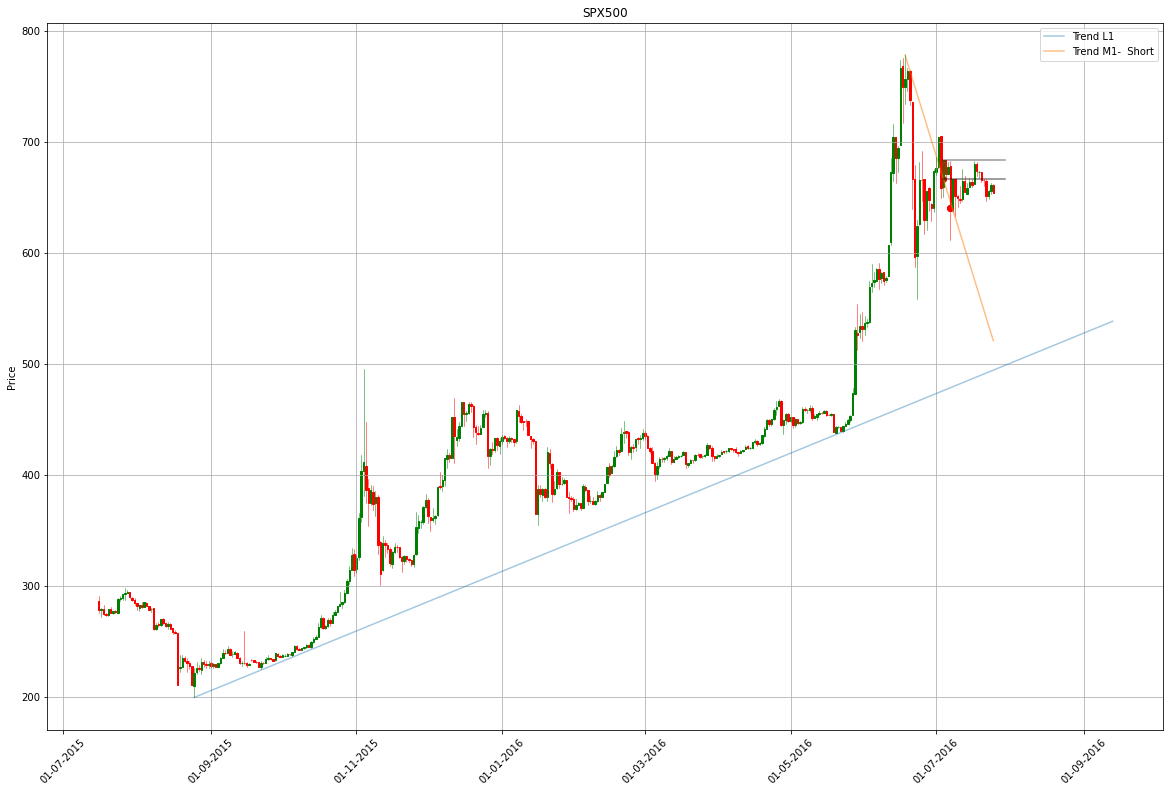

In [14]:
dfxxx.reset_index(inplace = True)
dfM11.reset_index(inplace = True)
dfM11a.reset_index(inplace = True)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(UpLineX11, UpLineY11, color='black', alpha = 0.4)
ax3.plot(DownLineX11, DownLineY11, color='black', alpha = 0.5)

ax4.scatter(BP11[0], BP11[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP12[0], BP12[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP13[0], BP13[1], alpha=1, color = 'red', edgecolors = 'face' )

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, dfxxx.values, width=0.6, colorup='g', colordown='r')
plt.show()

# Kolejne (3) przerwanie M1

In [161]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2016-08-05'

In [162]:
End = pd.to_datetime(End)
dfxxxx = df.loc[Start:End]
dfxxxx.index = dfxxxx.index.map(mdates.date2num)

In [163]:
#Liczymy dopiero od świeczki decyzyjnej BP31 - dla short lub BP21 - dla long
BP31[0]

16989.0

In [164]:
try:
    BP31
except NameError:

    print("First break of trend did not occur")

else:
    
    print("First break of trend occured. We can check if trend goes down and breaks trendline going up again")

First break of trend occured. We can check if trend goes down and breaks trendline going up again


In [165]:
#Sprawdzamy, czy trend został przebity w dół
dfM111 = dfxxxx[BP31[0]:]
dfM111['TrendLine'] = dfM111.index * a2 + b2
dfM111['DownBreakOfTL'] = dfM111['TrendLine'] - dfM111['Close']

In [166]:
#Jeśli TL zostało przecięte przez cene w dół:
if len(dfM111[dfM111['DownBreakOfTL']>0]) > 0:
    
    print('wystąpiło przerwanie w dół')
    BPDownPosition = dfM111.index[dfM111['DownBreakOfTL']>0][0]
    BPDownPrice = dfM111['Close'][dfM111['DownBreakOfTL'] > 0].iloc[0]

    print('----------------------------------------------')
    print('Nastąpiło kolejne przerwanie trendu dfM11 w dół')
    print(f'Pozycja przerwania: {BPDownPosition}')
    print(f'Cena przecięcia: {BPDownPrice}')
    print('Szukamy przecięcia w górę')
    print('---------------------------------------------')

    dfM111 = dfM111[BPDownPosition+1:]

    dfM111['Distance(Close-TL)'] = dfM111['TrendLine'] - dfM111['Close']
    dfM111['Distance(Open-TL)'] = dfM111['TrendLine'] - dfM111['Open']
    dfM111['Distance(High-TL)'] = round(dfM111['TrendLine'],1) - round(dfM111['High'],1)
    
    BPClosePositionToCheck = dfM111.index[dfM111['Distance(Close-TL)']<0][0]
    BPOpenPositionToCheck = dfM111.index[dfM111['Distance(Open-TL)']<0][0]
    
    #Jeżeli pierwsze lub pierwsze kolejne przecięcie nastąpiło od ceny zamknięcia do ceny otwarcia
    if BPOpenPositionToCheck > BPClosePositionToCheck:
    
    
        print('klasycznie - Przerwanie trendu M1 spadkowego w górę')


    #--------------------------------------------2---------------------------------------------------------------    
    #Jeżeli pierwsze lub pierwsze kolejne przecięcie nastąpiło od ceny otwarcia do ceny zamknięcia     
    elif BPOpenPositionToCheck < BPClosePositionToCheck:
        
        print('Cena otwarcia nad TL, Cena zamknięcia pod TL. Cena nie przecieła wykresu w górę!')
        print('Przerwanie trendu spadkowego w dół')
        
    elif BPOpenPositionToCheck == BPClosePositionToCheck:
        
        print('Przerwanie w górę')
        print('Cała świeca znalazła się nad wykresem (Bez high i low)')
        print('Downline = BP upline = Close lub open w zależności co jest wyżej') 
    
    
else:
    print('Brak przecięcia w dół')

wystąpiło przerwanie w dół
----------------------------------------------
Nastąpiło kolejne przerwanie trendu dfM11 w dół
Pozycja przerwania: 16989.0
Cena przecięcia: 640.562012
Szukamy przecięcia w górę
---------------------------------------------
Przerwanie w górę
Cała świeca znalazła się nad wykresem (Bez high i low)
Downline = BP upline = Close lub open w zależności co jest wyżej


In [167]:
# Cena przebita całą świecą

In [168]:
OpenBPPrice

678.090027

In [169]:
#Współrzędne tuneli
#Z BP cofamy się o jedną pozycję do tyłu

BPPosition = BPOpenPositionToCheck-1
dfM111 = dfxxxx[BPPosition:]
OpenBPPrice = dfM111['Open'].loc[BPPosition]
CloseBPPrice = dfM111['Close'].loc[BPPosition]
BPPrice = BPPosition * a2 + b2

BPPositionEnd = dfM111.index[-1] + 5

UpLineX21 = [BPPosition, BPPositionEnd]
UpLineY21 = [OpenBPPrice, OpenBPPrice]
DownLineX21 = [BPPosition, BPPositionEnd]
DownLineY21 = [BPPrice, BPPrice]

print('Przebicie trendu spadkowego M1 w górę')
print(f'Poziom wsparcia: {OpenBPPrice}')
print(f'Poziom oporu: {CloseBPPrice}')
print('---------------------------------------')

#Szukamy przecięć tuelu
dfM111a = dfxxxx[BPPosition+1:]
dfM111a['DownLine'] = BPPrice
dfM111a['UpLine'] = OpenBPPrice
dfM111a['Down-Close'] = dfM111a['Close'] - dfM111a['DownLine']
dfM111a['UP-Close'] = dfM111a['UpLine'] - dfM111a['Close']


#Liczymy przecięcia tuneli tuneli
DownBreaks = len(dfM111a['Close'][dfM111a['Down-Close'] < 0])
UpBreaks = len(dfM111a['Close'][dfM111a['UP-Close'] < 0])


#Jeżeli tylko przebicie w dół
if DownBreaks > 0 and UpBreaks == 0:

    BP22Price = dfM111a['Close'][dfM111a['Down-Close'] < 0].iloc[0]
    BP22Position = dfM111a.index[dfM111a['Down-Close']<0][0]
    BP21 = [BPPosition, BPPrice]
    BP22 = [BP22Position, BP22Price]
    BP23 = BP22

    print('Second BP founded')
    print(f'BP22Price: {BP22Price}, BP22Position: {BP22Position}')


    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
    HeightOfTunel = CloseBPPrice - BPPrice
    HeightOfBreak = BPPrice - BP22Price

    if HeightOfBreak >= 0.5 * HeightOfTunel:

        print('BP22 breaks Tunel by more than 50% height of tunel')
        print('Short position recomended')

    #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:

    elif dfM111['Close'].loc[BP23Position + 1] < BP22Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

        print('---------------------------------------------------------------------')
        print('Close price after BP is lower than BP close price and BP22 breaks Tunel by more than 30% height of tunel')

        print('Long position recomended')



    else:
        print('No decisice BP yet')

#----------------------------------------------------------------

#Jeśeli tylko przebicie w górę
elif UpBreaks >0 and DownBreaks ==0:

    BP23Price = dfM111a['Close'][dfM111a['UP-Close'] < 0].iloc[0]
    BP23Position = dfM111a.index[dfM111a['UP-Close'] < 0][0]
    BP21 = [BPPosition, BPPrice]
    BP23 = [BP23Position, BP23Price]
    BP22 = BP23

    print('Second BP founded')
    print(f'BP22Price: {BP23Price}, BP22Position: {BP23Position}')

    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
    HeightOfTunel = CloseBPPrice - BPPrice
    HeightOfBreak = BP23Price - CloseBPPrice

    if HeightOfBreak >= 0.5 * HeightOfTunel:

        print('------------------------------------------------')
        print('BP22 breaks Tunel by more than 50% height of tunel')
        print('Long position recomended')

    #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:

    elif dfM111['Close'].loc[BP23Position + 1] > BP23Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

        print('---------------------------------------------------------------------')
        print('Close price after BP is higher than BP close price and BP22 breaks Tunel by more than 30% height of tunel')

        print('Long position recomended')

    else:
        print('No decisice BP yet')

#------------------------------------------------------------------
#Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz

elif DownBreaks > 0 and UpBreaks > 0:

    BP21 = [BPPosition, BPPrice]

    BP22Price = dfM111a['Close'][dfM111a['Down-Close'] < 0].iloc[0]
    BP22Position = dfM111a.index[dfM111a['Down-Close']<0][0]

    BP23Price = dfM111a['Close'][dfM111a['UP-Close'] < 0].iloc[0]
    BP23Position = dfM111a.index[dfM111a['UP-Close'] < 0][0]

    #Jeśli BP22 (przebicie w dół) wystąpiło przed BP223 (przebicie w górę)
    if BP22Position < BP23Position:

        BP22 = [BP22Position, BP22Price]
        BP23 = [BP23Position, BP23Price]

        print('Long Position recomended')
        print(f'First Break Point: {BP21}')
        print(f'Second Break Point: {BP22}')
        print(f'Third and decisive Break Point: {BP23}')

    #Jeśli BP223 (przebicie w górę) wystąpiło przed BP22 (przebicie w dół)
    elif BP22Position > BP23Position:


        BP22 = [BP22Position, BP22Price]
        BP23 = [BP23Position, BP23Price]

        print('Short Position recomended')
        print(f'First Break Point: {BP21}')
        print(f'Second Break Point: {BP23}')
        print(f'Third and decisive Break Point: {BP22}')

#----------------------------------------------------------------------
#Jeżeli nie było żadnego przebicia
else:

    BP221 = [BPPosition, BPPrice]
    BP22 = BP21
    BP23 = BP21

    print('No break point founded. You should wait')

Przebicie trendu spadkowego M1 w górę
Poziom wsparcia: 678.090027
Poziom oporu: 640.562012
---------------------------------------
Short Position recomended
First Break Point: [16989.0, 645.8829330000008]
Second Break Point: [16999.0, 679.458984]
Third and decisive Break Point: [17013.0, 624.68103]


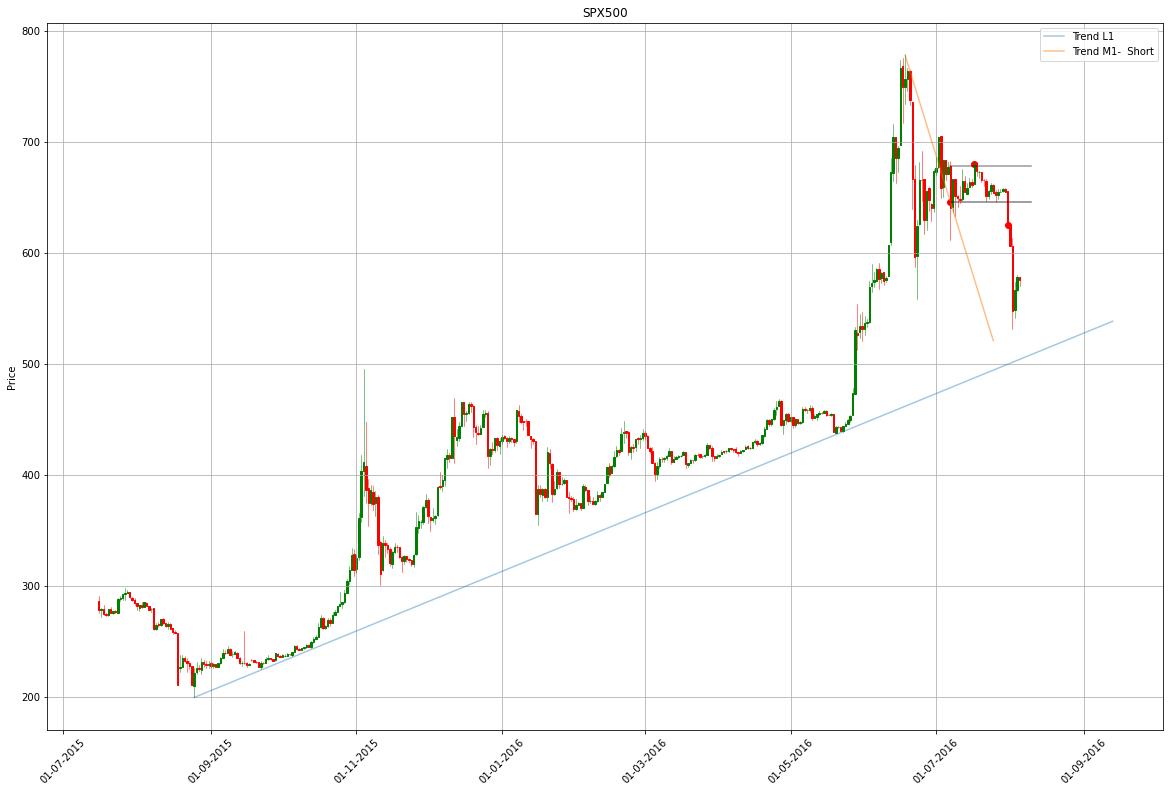

In [170]:
dfxxxx.reset_index(inplace = True)
dfM111.reset_index(inplace = True)
dfM111a.reset_index(inplace = True)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(UpLineX21, UpLineY21, color='black', alpha = 0.4)
ax3.plot(DownLineX21, DownLineY21, color='black', alpha = 0.5)


ax4.scatter(BP21[0], BP21[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP22[0], BP22[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP23[0], BP23[1], alpha=1, color = 'red', edgecolors = 'face' )

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, dfxxxx.values, width=0.6, colorup='g', colordown='r')
plt.show()